In [1]:
import os

from skimage import io
import numpy as np
import matplotlib.pyplot as plt

from imgcl.dataset import ImageDataset
from imgcl.config import TRAIN_VAL_DIR, TRAIN_VAL_LABELS_PATH

In [2]:
# !pip install ../

In [3]:
dataset = ImageDataset(TRAIN_VAL_DIR, TRAIN_VAL_LABELS_PATH)

In [4]:
def get_image(idx):
    idx = dataset._transform_idx(idx)
    img_path = os.path.join(dataset.data_dir, idx)
    img = io.imread(img_path)
    return img
    
def show_label_images(label):
    labels = np.array(list(dataset.labels.values()))
    label_idxs = np.argwhere(labels == label).flatten()
    sample_idxs = np.random.choice(label_idxs, 9)
    
    f, ax = plt.subplots(3, 3, figsize=(12, 12))
    for i in range(9):
        ax[i // 3][i % 3].imshow(get_image(sample_idxs[i]))
    plt.show()

In [5]:
import torchvision
from torchvision import transforms

In [121]:
my_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
#     transforms.ColorJitter(brightness=0.2, contrast=0.4, saturation=0, hue=0),
#     transforms.RandomAffine(30, translate=None, scale=None, shear=None, resample=False, fillcolor=0),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(20),
#     transforms.ToTensor()
])

In [122]:
img = get_image(0)
img = my_transforms(img)
# tensor = my_transforms(img) / 255 - 0.5

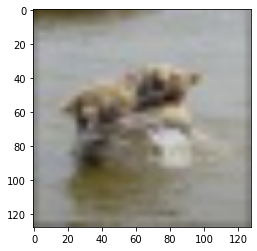

In [123]:
plt.imshow(img)

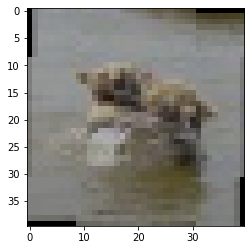

In [36]:
plt.imshow((tensor.permute(1, 2, 0) + 0.5) * 255)

In [37]:
from torch.utils.data import DataLoader, random_split

from imgcl.config import TRAIN_SIZE

dataset = ImageDataset(TRAIN_VAL_DIR, TRAIN_VAL_LABELS_PATH)
train_len = int(len(dataset) * TRAIN_SIZE)
val_len = len(dataset) - train_len
train_dataset, val_dataset = random_split(dataset, [train_len, val_len])
val_dataset.is_train = False

In [39]:
dataset.is_train = False

In [72]:
import torch
tensor = torch.from_numpy(img).permute(2, 0, 1).float()
tensor = tensor / 255 - 0.5

In [75]:
val_sample = tensor.permute(1, 2, 0)
val_sample = (val_sample + 0.5) * 255

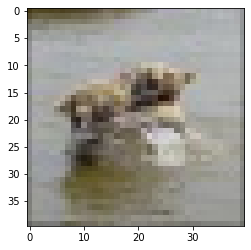

In [92]:
plt.imshow(val_sample.int())

### NN

In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [98]:
x = tensor.unsqueeze(0)

In [105]:
conv1 = nn.ConvTranspose2d(3, 32, 5)
conv2 = nn.

In [106]:
conv(x).shape

torch.Size([1, 32, 44, 44])